## **Predicción de Calidad del Vino (Core)**

## **Objetivo**

Utilizar técnicas de clasificación aprendidas hasta el momento para predecir la calidad del vino basándose en características físico-químicas. Este ejercicio permitirá aplicar conceptos como la selección de características, preprocesamiento de datos, entrenamiento y evaluación de modelos de clasificación, y análisis de resultados mediante métricas y visualizaciones.

## **Descripción del Dataset:** 
Este conjunto de datos contiene información sobre distintas características físico-químicas de muestras de vino tinto y su calidad asociada. Las características incluyen acidez fija, acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre, dióxido de azufre total, densidad, pH, sulfatos y alcohol. La calidad del vino está clasificada en una escala del 0 al 10.

### **Instrucciones:**

**1. Carga y Exploración de Datos:**

- Cargar el dataset y revisar su estructura básica.

- Describir las variables y su distribución.

- Identificar y tratar valores nulos y outliers.

**2. Preprocesamiento de Datos:**

- Seleccionar características importantes para la clasificación.

- Transformar variables categóricas en variables numéricas si es necesario.

- Dividir los datos en conjuntos de entrenamiento y prueba.

- Escalar las características.

**3. Entrenamiento de Modelos de Clasificación:**

- Entrenar al menos tres modelos de clasificación diferentes (por ejemplo, KNN, RandomForest, y Regresión Logística).

- Utilizar validación cruzada para seleccionar los mejores hiperparámetros.

**4. Evaluación de Modelos:**

- Evaluar los modelos utilizando métricas como exactitud, precisión, recall, F1-Score y matriz de confusión.

- Generar un informe de clasificación para cada modelo.

- Crear y visualizar la curva ROC y calcular el AUC para el mejor modelo.

**5. Análisis y Comparación de Resultados:**

- Comparar el rendimiento de los diferentes modelos.

- Discutir cuál modelo ofrece el mejor rendimiento y por qué.

- Identificar las fortalezas y debilidades de cada enfoque en este contexto.

**6. Repositorio en GitHub:**

- Crear un repositorio en GitHub con el código y los resultados del análisis.

- Crear un tag de liberación con una breve descripción de la versión final del proyecto.




Shape del dataset: (1143, 13)

Primeras filas del dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0

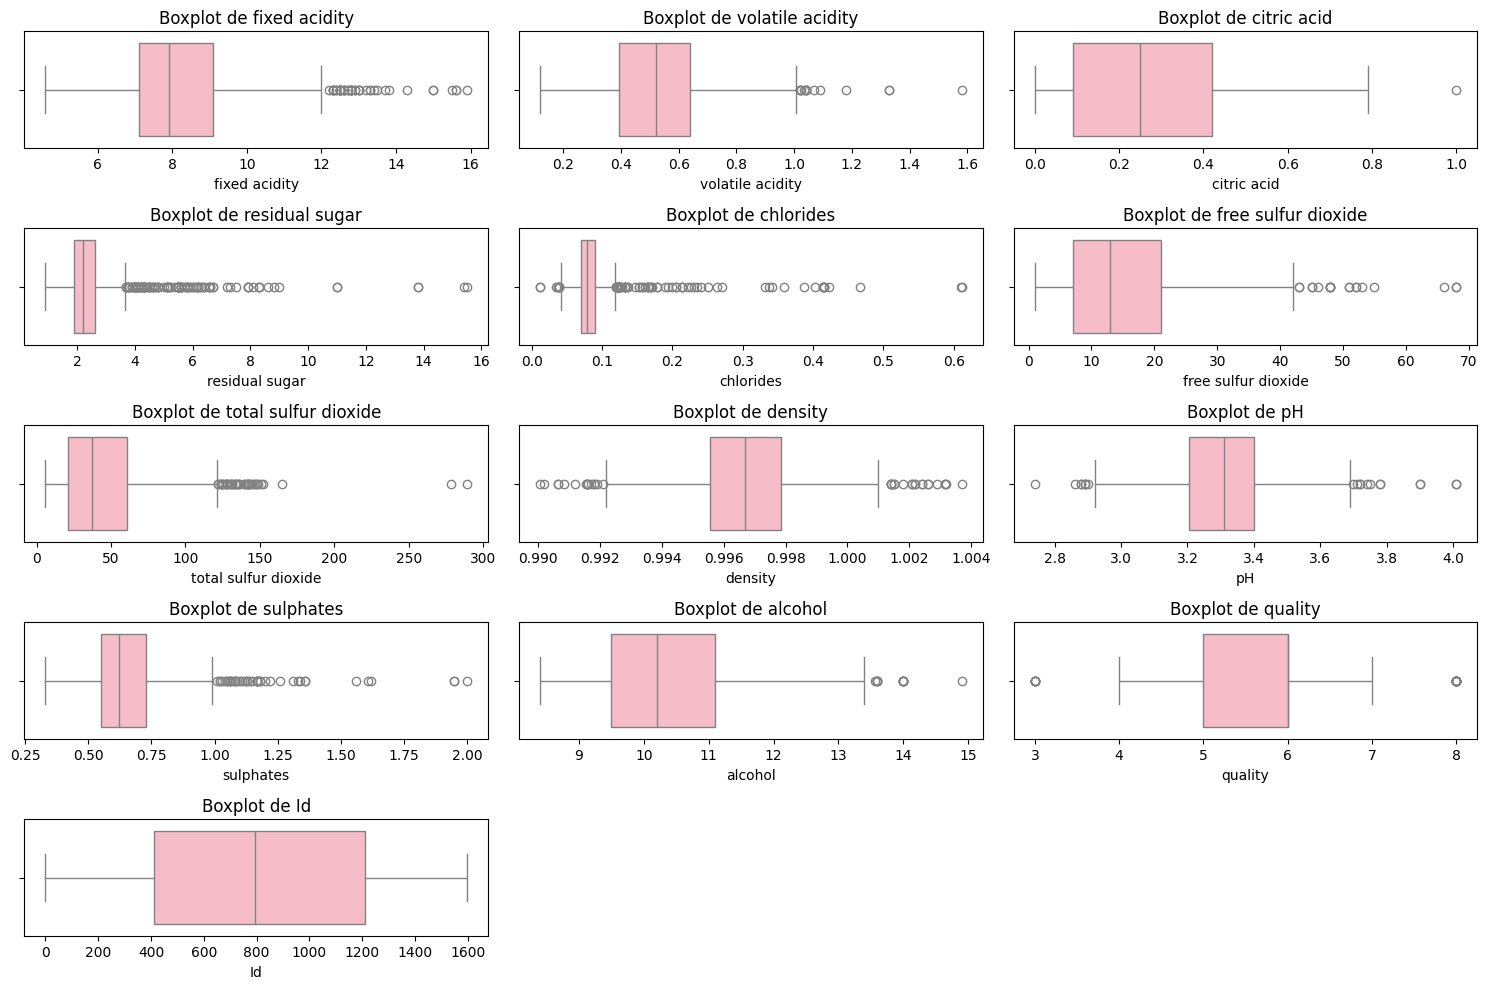

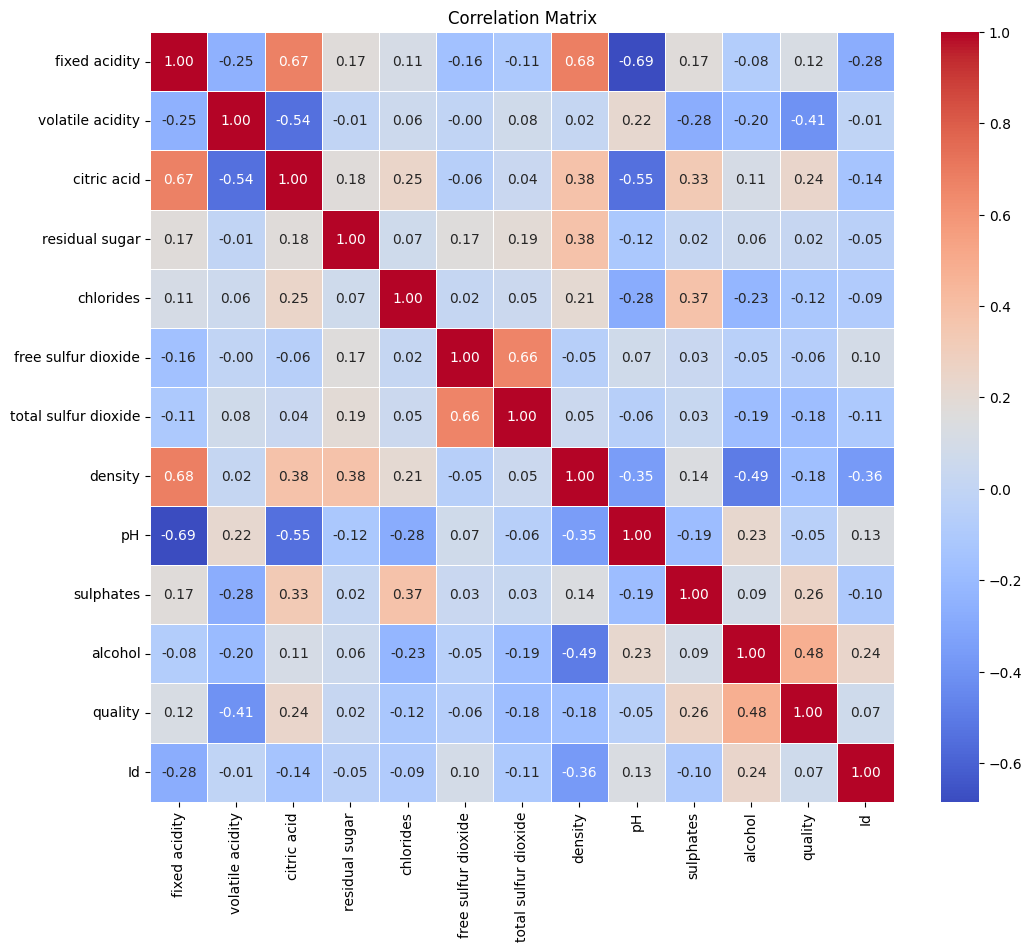

In [91]:
# --- 1. Carga y Exploración de Datos ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
file_path = r'C:\Users\Andy\Documents\CodingDojo\Módulo_2_ML\Tareas_ML\Data_Tareas_ML\WineQT.csv'
data = pd.read_csv(file_path)

# Inspección inicial del dataset
print("Shape del dataset:", data.shape)
print("\nPrimeras filas del dataset:")
print(data.head())
print("\nDescripción del dataset:")
print(data.describe())

# Crear un diccionario con el nombre de las columnas y sus tipos de datos
column_info = {col: str(data[col].dtype) for col in data.columns}

# Mostrar el diccionario
print("\n--- Información de las Columnas y sus Tipos ---")
print(column_info)

# Identificar valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())

# Identificar duplicados
print("\nNúmero de filas duplicadas:", data.duplicated().sum())

# Eliminar filas duplicadas del dataset
data.drop_duplicates(inplace=True)

# Confirmar cambios
print("\n--- Duplicados eliminados ---")
print(f"Tamaño del dataset después de eliminar duplicados: {data.shape}")

# Visualizar outliers para variables numéricas
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i)
    sns.boxplot(data=data, x=col, color='#ffb3c1')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

# Generar la matriz de correlación para las columnas numéricas
correlation_matrix = data.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# 2. Preprocesamiento de datos
# Seleccionar las características y la variable objetivo
X = data.drop(columns=['Id', 'quality'])
y = data['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Información del conjunto procesado
print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)
print("Sample of Scaled Training Features:")
print(X_train_scaled[:5])

Training Set Shape: (914, 11)
Test Set Shape: (229, 11)
Sample of Scaled Training Features:
[[-0.01210056  0.38868446 -0.10911257 -0.26432431  0.60989729 -0.64342692
  -0.23628614 -0.29922927 -1.03951096 -0.73117094 -0.60847324]
 [ 1.24861507 -1.62648508  0.76121141 -0.60051136 -0.20855539 -0.94293912
  -0.71905924  0.45417318 -0.64990748  2.26306416  0.33096011]
 [ 0.67556251 -0.39499258  1.1195801   3.18159298 -0.46806477 -1.04277652
  -0.86992584  1.08200856 -0.64990748  0.42045794  0.51884678]
 [-1.55934247  0.50063833 -1.23541419 -0.85265165 -0.14866861 -0.94293912
  -0.99061911 -0.91660072  2.27211861 -0.21293794 -0.32664324]
 [ 0.33173097  0.33270753  1.17077563 -0.43241784  4.9816323   1.15364628
   1.06116658 -0.1736622  -1.753784    5.48762504 -0.89030325]]


In [88]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 3. Entrenamiento de modelos
results = {}

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)
results['KNN'] = {
    'Best Params': knn_grid.best_params_,
    'Best Score': knn_grid.best_score_,
}

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train_scaled, y_train)
results['RandomForest'] = {
    'Best Params': rf_grid.best_params_,
    'Best Score': rf_grid.best_score_,
}

# Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr_params = {'C': [0.1, 1, 10], 'penalty': ['l2']}
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train_scaled, y_train)
results['LogisticRegression'] = {
    'Best Params': lr_grid.best_params_,
    'Best Score': lr_grid.best_score_,
}

# Imprimir los resultados
print(results)

{'KNN': {'Best Params': {'n_neighbors': 9, 'weights': 'distance'}, 'Best Score': np.float64(0.611613523088933)}, 'RandomForest': {'Best Params': {'max_depth': 20, 'n_estimators': 200}, 'Best Score': np.float64(0.6531736023539302)}, 'LogisticRegression': {'Best Params': {'C': 1, 'penalty': 'l2'}, 'Best Score': np.float64(0.587557797393863)}}


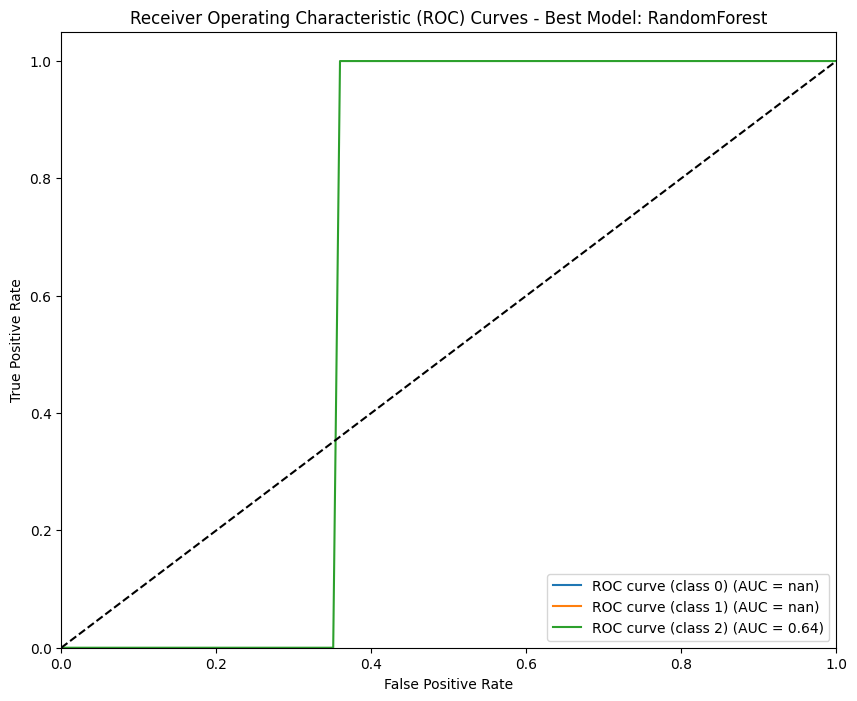

Model: KNN
Accuracy: 0.67
Precision (Weighted): 0.64
Recall (Weighted): 0.67
F1-Score (Weighted): 0.65
Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  0  4  3  0  0]
 [ 0  0 74 20  3  0]
 [ 0  0 19 67  6  0]
 [ 0  0  1 15 13  0]
 [ 0  0  1  1  1  0]]


Model: RandomForest
Accuracy: 0.71
Precision (Weighted): 0.67
Recall (Weighted): 0.71
F1-Score (Weighted): 0.69
Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  0  4  3  0  0]
 [ 0  0 82 14  1  0]
 [ 0  0 22 66  4  0]
 [ 0  0  3 12 14  0]
 [ 0  0  0  2  1  0]]


Model: LogisticRegression
Accuracy: 0.62
Precision (Weighted): 0.59
Recall (Weighted): 0.62
F1-Score (Weighted): 0.60
Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  0  4  3  0  0]
 [ 0  0 76 19  2  0]
 [ 0  0 25 58  8  1]
 [ 0  0  2 18  9  0]
 [ 0  0  0  1  2  0]]




In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Evaluar modelos y calcular métricas
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (Weighted)": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "Recall (Weighted)": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score (Weighted)": f1_score(y_test, y_pred, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    }
    return metrics

# Evaluación de cada modelo
evaluation_results = {
    "KNN": evaluate_model(knn_best, X_test_scaled, y_test),
    "RandomForest": evaluate_model(rf_best, X_test_scaled, y_test),
    "LogisticRegression": evaluate_model(lr_best, X_test_scaled, y_test)
}

# Identificar el mejor modelo basado en F1-Score
best_model_name = max(evaluation_results, key=lambda x: evaluation_results[x]["F1-Score (Weighted)"])
best_model = {"KNN": knn_best, "RandomForest": rf_best, "LogisticRegression": lr_best}[best_model_name]

# Generar curva ROC y calcular AUC para el mejor modelo
y_test_bin = label_binarize(y_test, classes=sorted(y.unique()))
n_classes = y_test_bin.shape[1]
y_pred_proba_best = best_model.predict_proba(X_test_scaled)

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_best[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {i}) (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curves - Best Model: {best_model_name}')
plt.legend(loc="lower right")
plt.show()

# Mostrar resultados de evaluación
for model_name, metrics in evaluation_results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"Precision (Weighted): {metrics['Precision (Weighted)']:.2f}")
    print(f"Recall (Weighted): {metrics['Recall (Weighted)']:.2f}")
    print(f"F1-Score (Weighted): {metrics['F1-Score (Weighted)']:.2f}")
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

In [96]:
# Crear un DataFrame con las métricas clave para comparación
comparison_data = {
    "Model": [],
    "Accuracy": [],
    "Precision (Weighted)": [],
    "Recall (Weighted)": [],
    "F1-Score (Weighted)": []
}

for model_name, metrics in evaluation_results.items():
    comparison_data["Model"].append(model_name)
    comparison_data["Accuracy"].append(metrics["Accuracy"])
    comparison_data["Precision (Weighted)"].append(metrics["Precision (Weighted)"])
    comparison_data["Recall (Weighted)"].append(metrics["Recall (Weighted)"])
    comparison_data["F1-Score (Weighted)"].append(metrics["F1-Score (Weighted)"])

# Convertir los datos a un DataFrame para análisis
comparison_df = pd.DataFrame(comparison_data)

# Identificar el mejor modelo basado en F1-Score
best_model_row = comparison_df.loc[comparison_df['F1-Score (Weighted)'].idxmax()]
best_model_name = best_model_row["Model"]

# Mostrar la comparación en tabla
print("Comparison of Models:")
print(comparison_df)

# Mostrar la comparación en tabla
print("Comparación de Modelos:")
print(comparison_df)

# Analizar fortalezas y debilidades
print(f"\nMejor Modelo: {best_model_name}")
print("Fortalezas y Debilidades:")
for nombre_modelo, metricas in evaluation_results.items():
    print(f"\nModelo: {nombre_modelo}")
    print(f"Fortalezas: {'Buen rendimiento en clases con mayor soporte' if metricas['Accuracy'] > 0.65 else 'Podría mejorar en recall y F1-Score para clases minoritarias'}")
    print(f"Debilidades: {'Dificultad con clases minoritarias' if metricas['Precision (Weighted)'] < 0.7 else 'Maneja bien el balance entre clases'}")

Comparison of Models:
                Model  Accuracy  Precision (Weighted)  Recall (Weighted)  \
0                 KNN  0.672489              0.638962           0.672489   
1        RandomForest  0.707424              0.672121           0.707424   
2  LogisticRegression  0.624454              0.587715           0.624454   

   F1-Score (Weighted)  
0             0.653431  
1             0.685329  
2             0.603652  
Comparación de Modelos:
                Model  Accuracy  Precision (Weighted)  Recall (Weighted)  \
0                 KNN  0.672489              0.638962           0.672489   
1        RandomForest  0.707424              0.672121           0.707424   
2  LogisticRegression  0.624454              0.587715           0.624454   

   F1-Score (Weighted)  
0             0.653431  
1             0.685329  
2             0.603652  

Mejor Modelo: RandomForest
Fortalezas y Debilidades:

Modelo: KNN
Fortalezas: Buen rendimiento en clases con mayor soporte
Debilidades: Dificul